In [2]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math 
from math import log
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import open3d as o3d
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

In [3]:
# Leggi il file Excel,output di RAPID_MINER 
import os
import pandas as pd

#desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
file_path = os.path.join(r"D:\Nicola\Documents\poli\Articolo Tunnelling\Classification Validation\Dati\Training_Dataset.xlsx")

data = pd.read_excel(file_path)

X = data.iloc[:, 1:10]  # Seleziona le prime 8 colonne come feature
y = data['prediction']  # Seleziona l'ultima colonna come target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=60)

clf = RandomForestClassifier(n_estimators=80, criterion ="entropy", min_samples_leaf=1, max_depth=50)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuratezza:", accuracy)


Accuratezza: 1.0


In [24]:
data= []

n_estimators_list = [25, 50, 75, 100, 125, 150, 200, 250, 300, 350, 400]
criterion_list = ["gini", "entropy"]
min_samples_leaf_list = [1,2,3,5,10]
max_depth_list = [None, 5,10,15,20,30,40,50,60]
#random_state_list = [10, 20, 60]


for criterion_list_value in criterion_list:
    for n_estimator_value in n_estimators_list:
        for min_samples_leaf_value in min_samples_leaf_list:
            for max_depth_value in max_depth_list:
                for random_state_value in random_state_list:
                    clf = RandomForestClassifier(n_estimators=n_estimator_value, criterion =criterion_list_value, min_samples_leaf=min_samples_leaf_value, max_depth=max_depth_value)
                    clf.fit(X_train, y_train)

                    predictions = clf.predict(X_test)
                    accuracy = accuracy_score(y_test, predictions)

                    data.append([criterion_list_value,n_estimator_value,min_samples_leaf_value,max_depth_value,random_state_value, accuracy])
dati = pd.DataFrame(data, columns=[ 'Criterion', 'Estimator', 'min_samples', 'max_depth','random_sample', 'accuracy'])

file_path = os.path.join( r'D:\Nicola\Documents\poli\Articolo Tunnelling\Classification Validation\Results_sim_4.xlsx')
dati.to_excel(file_path, index=False)
                
                #print("n_estimator: "+str(n_estimator_value)+"\n"+"criterion: "+str(criterion_list_value)+"\n"+"n_min_samples: "+str(min_samples_leaf_value)+"\n"+"n_max_depth: "+str(max_depth_value)+"\n"+"Accuratezza:"+ str(accuracy)+"\n"+"\n")

In [40]:
len(data)

2970

In [41]:
max_min_leaf=[]
for c in min_samples_leaf_list:
    new_max = 0
    for row in data:
        if row[2] == c:
            massimo = row[5]
            if massimo > new_max:
                new_max = massimo
    row_= [c , massimo]
    max_min_leaf.append(row_)
print(max_min_leaf)
print(len(max_min_leaf))

[[1, 0.937178166838311], [2, 0.9366632337796087], [3, 0.9340885684860968], [5, 0.9289392378990731], [10, 0.9207003089598352]]
5


In [39]:
max_max_depth=[]
for c in max_depth_list:
    new_max = 0
    for row in data:
        if row[3] == c:
            massimo = row[5]
            if massimo > new_max:
                new_max = massimo
    row_= [c , massimo]
    max_max_depth.append(row_)
print(max_max_depth)
print(len(max_max_depth))

[[None, 0.9212152420185376], [5, 0.815653964984552], [10, 0.9109165808444902], [15, 0.917610710607621], [20, 0.9207003089598352], [30, 0.9196704428424305], [40, 0.9186405767250257], [50, 0.9201853759011328], [60, 0.9207003089598352]]
9


In [22]:
data= []

n_estimators_list = [100,120,150,200]
criterion_list = ["gini", "entropy"]
min_samples_leaf_list = [1]
max_depth_list = [None, 10, 15, 35, 50]
random_state_list = [5,6,7,8]


for criterion_list_value in criterion_list:
    for n_estimator_value in n_estimators_list:
        for min_samples_leaf_value in min_samples_leaf_list:
            for max_depth_value in max_depth_list:
                for random_state_value in random_state_list:
                    clf = RandomForestClassifier(n_estimators=n_estimator_value, criterion =criterion_list_value, min_samples_leaf=min_samples_leaf_value, max_depth=max_depth_value, random_state=random_state_value)
                    clf.fit(X_train, y_train)

                    predictions = clf.predict(X_test)
                    accuracy = accuracy_score(y_test, predictions)

                    data.append([criterion_list_value,n_estimator_value,min_samples_leaf_value,max_depth_value,random_state_value, accuracy])
dati = pd.DataFrame(data, columns=[ 'Criterion', 'Estimator', 'min_samples', 'max_depth','random_sample', 'accuracy'])

file_path = os.path.join( r'D:\Nicola\Documents\poli\Articolo Tunnelling\Classification Validation\Results_random_state_7.xlsx')
dati.to_excel(file_path, index=False)
                
                #print("n_estimator: "+str(n_estimator_value)+"\n"+"criterion: "+str(criterion_list_value)+"\n"+"n_min_samples: "+str(min_samples_leaf_value)+"\n"+"n_max_depth: "+str(max_depth_value)+"\n"+"Accuratezza:"+ str(accuracy)+"\n"+"\n")

KeyboardInterrupt: 

In [10]:
print("n_estimator: "+"\n"+"n_estimator: "+"\n")

n_estimator: 
n_estimator: 



In [18]:
estimators_ = []
criterion_ = []
min_samples_ = []
max_depth_ = []

data= []

n_estimators_list = [20, 50]
criterion_list = ["gini"]
min_samples_leaf_list = [1,2]
max_depth_list = [None]

for criterion_list_value in criterion_list:
    for n_estimator_value in n_estimators_list:
        for min_samples_leaf_value in min_samples_leaf_list:
            for max_depth_value in max_depth_list:
                clf = RandomForestClassifier(n_estimators=n_estimator_value, criterion =criterion_list_value, min_samples_leaf=min_samples_leaf_value, max_depth=max_depth_value, random_state=max_depth_value)
                clf.fit(X_train, y_train)

                predictions = clf.predict(X_test)
                accuracy = accuracy_score(y_test, predictions)
                
                estimators_.append(criterion_list_value)
                criterion_.append(n_estimator_value)
                min_samples_.append(min_samples_leaf_value)
                max_depth_.append(max_depth_value)

                

                data.append([criterion_list_value,n_estimator_value,min_samples_leaf_value,max_depth_value, accuracy])
dati = pd.DataFrame(data, columns=[ 'Criterion', 'Estimator', 'min_samples', 'max_depth', 'accuracy'])

file_path = os.path.join( r'D:\Nicola\Documents\poli\Articolo Tunnelling\Classification Validation\Results.xlsx')
dati.to_excel(file_path, index=False)
                
                #print("n_estimator: "+str(n_estimator_value)+"\n"+"criterion: "+str(criterion_list_value)+"\n"+"n_min_samples: "+str(min_samples_leaf_value)+"\n"+"n_max_depth: "+str(max_depth_value)+"\n"+"Accuratezza:"+ str(accuracy)+"\n"+"\n")

In [6]:
dati

,Criterion,Estimator,min_samples,max_depth,accuracy
0,gini,20,1,NaN,0.941489
1,gini,20,1,1.0,0.638889
2,gini,20,1,3.0,0.751773
3,gini,20,1,6.0,0.868203
4,gini,20,1,10.0,0.924941
...,...,...,...,...,...
445,entropy,300,5,10.0,0.914303
446,entropy,300,5,15.0,0.930851
447,entropy,300,5,22.0,0.936170
448,entropy,300,5,35.0,0.934397


In [9]:
# Leggi il file Excel,output di RAPID_MINER 
import os
import pandas as pd

#desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
file_path = os.path.join(r"D:\Nicola\Documents\poli\Articolo Tunnelling\Classification Validation\Dati\Training_Dataset_2.xlsx")

data = pd.read_excel(file_path)

X = data.iloc[:, 1:10]  # Seleziona le prime 8 colonne come feature
y = data['prediction']  # Seleziona l'ultima colonna come target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=60)

clf = RandomForestClassifier(n_estimators=150, criterion ="gini", min_samples_leaf=2, max_depth=50)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuratezza:", accuracy)


Accuratezza: 1.0


In [10]:
file_path = r"D:\Nicola\Documents\poli\Articolo Tunnelling\Classification Validation\Dati\Test_Dataset_2_nolabel.xlsx"
dati_classificare = pd.read_excel(file_path) 

In [11]:

risultati = clf.predict(dati_classificare)

dati_classificare.insert(9, "prediction", risultati)

dati_classificare.to_excel(file_path, index=False)

dati_classificare

,CentroidX,CentroidY,CentroidZ,NormCentroidX,NormCentroidY,NormCentroidZ,NumPoints,Volume,Density,prediction
0,-3.037128,-3.736412,0.152855,-0.405097,-0.371569,-0.832386,91,0.260959,0.002868,S
1,-0.799204,-5.317395,0.190208,-0.010309,-0.030301,-0.999137,730,9.493228,0.013004,S
2,0.347489,-7.248511,2.339598,0.683061,0.616416,-0.141527,61988,844.298363,0.013620,L
3,-0.910454,-5.226734,0.190070,0.004433,0.027419,0.999436,3155,7.493735,0.002375,S
4,0.240069,5.522964,-0.092122,0.205623,0.153716,-0.954712,843,8.154412,0.009673,S
...,...,...,...,...,...,...,...,...,...,...
2725,-4.111841,5.596691,6.401504,0.584177,-0.048073,-0.809197,44,0.124371,0.002827,L
2726,3.819293,5.465857,6.381194,-0.593876,0.032923,-0.803851,15,0.001481,0.000099,L
2727,-3.619745,5.880797,6.089800,0.863500,-0.045763,-0.469387,47,0.035257,0.000750,E
2728,3.241086,6.197105,6.066277,-0.338188,0.014189,-0.940024,44,0.011664,0.000265,E


FileNotFoundError: [WinError 2] Impossibile trovare il file specificato

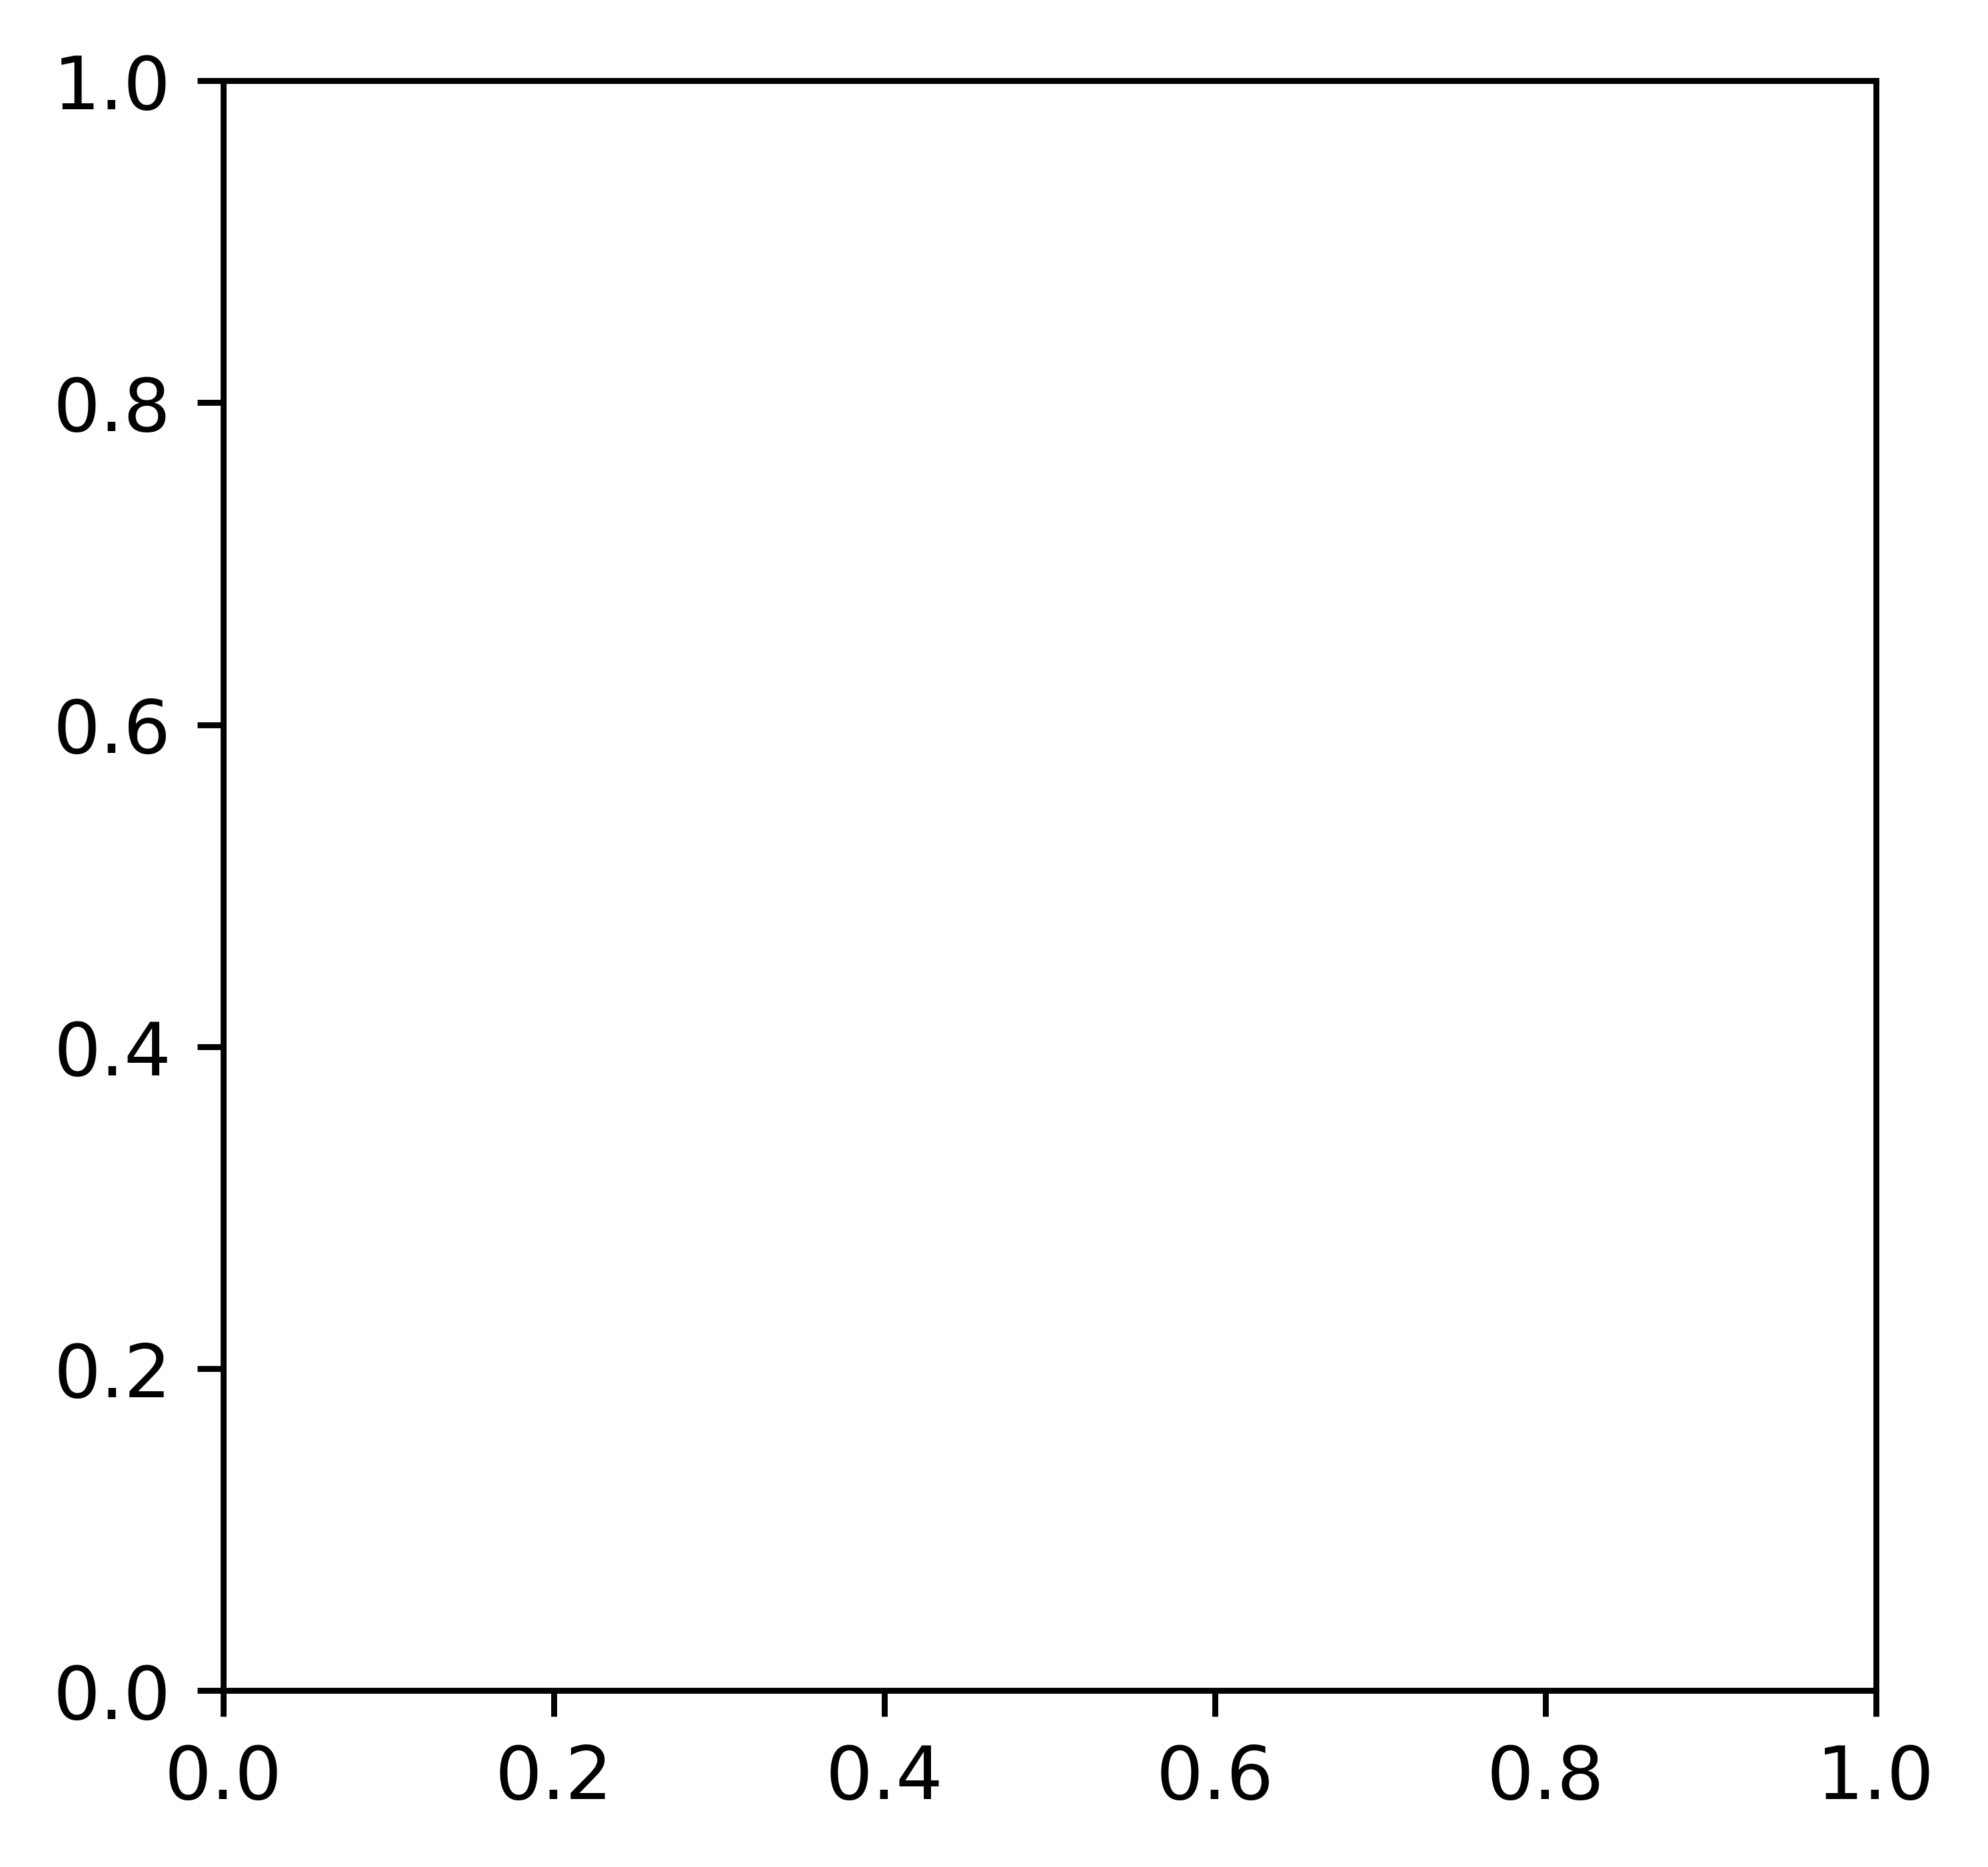

In [63]:
from sklearn.tree import export_graphviz
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
export_graphviz(clf.estimators_[0],
                out_file='tree.dot',
                feature_names=X.columns,
                filled=True,
                rounded=True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [64]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dtreg, out_file=None, feature_names=X.columns))
from IPython.display import SVG
graph = Source( tree.export_graphviz(dtreg, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))

ModuleNotFoundError: No module named 'graphviz'

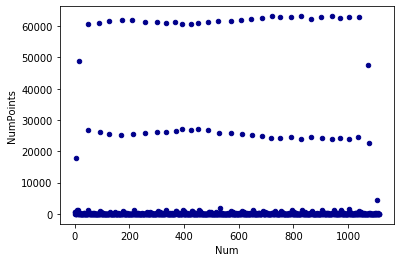

In [11]:
dati_pergrafico.plot.scatter(x='Num', y='NumPoints', c='DarkBlue')

In [14]:
dati_pergrafico.Num

0          0
1          1
2          2
3          3
4          4
        ... 
1110    1110
1111    1111
1112    1112
1113    1113
1114    1114
Name: Num, Length: 1115, dtype: int64

In [7]:
file_path = r"D:\Nicola\Dottorato\TECNE\nuvole\Python\Classification Validation\Dati\Monreale\ManualClass\MO_apply_Classification_chart.xlsx"
dati_pergrafico = pd.read_excel(file_path) 

dati_pergrafico

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Nicola\\Dottorato\\TECNE\\nuvole\\Python\\Classification Validation\\Dati\\Monreale\\ManualClass\\MO_apply_Classification_chart.xlsx'

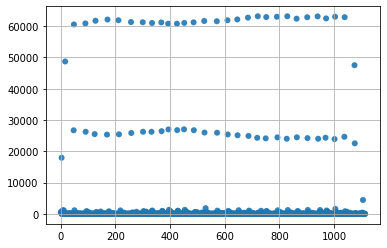

In [20]:
fig, ax = plt.subplots()

n = 750
x= np.asarray(dati_pergrafico.Num)
y= np.asarray(dati_pergrafico.NumPoints)

ax.scatter(x, y, c="tab:blue", alpha=0.9, edgecolors='none')

#ax.legend()
ax.grid(True)

plt.show()